<a href="https://colab.research.google.com/github/zberglun/Flour-Survey-Data/blob/main/Copy_of_flour_model_Hygiene_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Code Walkthrough
## Meta Commentary
This document will serve as a guided step through for the code. It will explain each line and section and the logical flow. One important thing to note is how comments work in R.
The "#" symbol is seen as line comments, meaning the code will not compile or run on that line. Additionally " ''' " denotes a block comment. So sections of text or code between two sets of ''' will be treated as comments


## Outline
The code will have the following sections
1. Data Import and Package Loading
2. Data Exploration
3. Feature Selection
4. Data Transformation
5. Model Ensemble Creation
6. Top Feature Extraction
7. PDP Plots and ggplot2
8. Results Graphs
9. Supplmentary unused explorations for possible future investigation

# Data Import and Package Loading
R functions off of a series of pre-written code by other scientists and statisticans through it's open source nature.
A set of these pre-written codes are bundled together and published online as packages. Packages are also interchangably called libraries.
Packages are the fundamentals used by other researchers and industry professionals, similar to the way we cite papers in our manuscript, we need to keep track of the packages we use and cite them as well to give proper credit to the authors. It also means we have to use our judgement and trust that the algorithms are coded and implented correctly on their end.

## Section Description
This section will load all the packages used in the analysis, there are some main packages used, which then also load other smaller packages. Additionally, this section will load the data from the CSV or excel file into the R environment. Think of the environment as a small virtual desktop of files and data that the programming language can see and interact with. Keep in mind on Kaggle, data from the computer will first be needed to be loaded manually into the Kaggle environment as it too is a seperate virutal space.  
Think loading order as:
* Computer -> Kaggle -> R

This way we can then focus on manipulation being done in R. It also means any changes to the dataset in R are not reflected in the data stored both on Kaggle and on the Computer.

### Important Packages
* Tidyverse
    + This is a package, or a set of coding operations and tools that can streamline code and can make things more easy to read.
* ggplot2, ggarrange
    + These packages are used to create visualizations, i.e the bar charts and PDPs (These will be explained in their relevant section).
* Caret, CaretList
    + These package are used to create machine learning models, or in the case of CaretList, model-ensembles
* stats
    + This is one the most important packages, it contains most of every useful model needed
* PDP
    + This package is used to created the PDP plots, it uses the models to create predictions, and then uses these predictions to create the plots
* rpub
    + This package contains several useful functions for visualization ?  Not sure if used?
* Psych
    + This package is basically if stats package had a baby with the psycology and sociology field. It's useful for non-parametric tools.
* FontQuiver, etc.
    + These packages are libraries of fonts enabling custom font, or simple windows fonts to be used in ggplot.
* qqplotr
    + this package is used to create the qq plots
* base
    + this package is not on the code, as it is already loaded by default. It's the package all other libraries are made on top off, think of it as progenitor
* stringr
    + this package contains tools useful for when working with strings, or text.

In [ ]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "3.2"

$year
[1] "2023"

$month
[1] "10"

$day
[1] "31"

$`svn rev`
[1] "85441"

$language
[1] "R"

$version.string
[1] "R version 4.3.2 (2023-10-31)"

$nickname
[1] "Eye Holes"

In [ ]:
### This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats

# Start with installing special packages not on Kaggle environment natively


install.packages("knitr")
library(knitr)

suppressWarnings({
 # Code that generates warning messages
install.packages("pbkrtest") #Install older version
install.packages("car")
install.packages("ggpubr")
install.packages("MultNonParam")
install.packages("pre")
install.packages("ggpubr")
install.packages("psych")
install.packages("gmodels")
install.packages("caret")
install.packages("manipulate")
install.packages("expm")
install.packages("DescTools")
install.packages("randomForest")
install.packages("viridis")
install.packages("pdp")
install.packages("iml")
install.packages("neuralnet")
install.packages("party")
install.packages("caretEnsemble")
install.packages("caTools")
install.packages("LogicReg")
install.packages("DMwR2")
install.packages("vip")
#import needed libraries
library(tidyverse) # metapackage of all tidyverse packages,
library(psych)
library(gmodels)
library(base)
library(datasets)
library(graphics)
library(caret)
library(grDevices)
library(methods)
library(stats)
library(utils)
library(rpart)
library(lattice)
library(ggplot2)
library(reshape2)
library(carData)
library(manipulate)
library(mvtnorm)
library(expm)
library(DescTools)
library(nnet)
library(randomForest)
library(gridExtra)
library(viridis)
library(pdp)
library(iml)
library(neuralnet)
library(party)
library(plyr)
library(devtools)
library(caretEnsemble)
library(psych)
library(base)
library(colorspace)
library(datasets)
library(graphics)
library(grDevices)
library(methods)
library(stringr)
library(stats)
library(utils)
library(ModelMetrics)
library(recipes)
library(rpart)
library(lattice)
library(ggplot2)
library(reshape2)
library(mvtnorm)
library(e1071)
library(caTools)
library(nnet)
library(randomForest)
library(gridExtra)
library(viridis)
library(partykit)
library(pdp)
library(iml)
library(neuralnet)
library(party)
library(plyr)
library(dplyr)
library(LogicReg)
library(caret)
library(caretEnsemble)
library(DMwR2)
library(gmodels)
library(data.table)
library(MultNonParam)
library(pre)
library(vip)
library(ggpubr)
library(rstatix)
})
# Input data files are available in the read-only "../input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



#the <- is an assignment operator. This tells R to store whatever is on the right side of the operator as a variable with the name of the left side. This symbol is equivalent to = in other languages
#In this case, we read the data file from a txt file, keep the header from the file as names for the variables, and to keep the data types for each variable as read by R.
#R predicts he datatypes based on the first few rows of data. learn about data types below


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘quantreg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mitools’, ‘survey’, ‘mvtnorm’, ‘ICS’, ‘ICSNP’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘iterators’, ‘plotmo’, ‘TeachingDemos’, ‘foreach’, ‘shape’, ‘libc

In [ ]:
######################################################################### Load Data from Google Drive #################################################################

# Mount Google Drive in an R kernel
library("googledrive")
library("googlesheets4")
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
suppressMessages({
install.packages("R.utils")
library(R.utils)
library(httr)
library(rlang)
})
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check)
reassignInPackage("is_interactive", pkgName = "rlang", my_check)
}
# Call Google Drive authentication forcing interactive login and save in cache
googledrive::drive_auth(use_oob = TRUE, cache = TRUE)
print("Connected Successfully")

# Find Google Sheets
Sheets <- googledrive::drive_find(type = "spreadsheet")
# Reuse token to Sheet authentification
googlesheets4::gs4_auth(token = drive_token())
# Read first Google Sheet in Google Drive
a <- googlesheets4::read_sheet("https://docs.google.com/spreadsheets/d/1wG9ZRiQNqTO6AO-47hZs9uxi1JvGWuU99EuSr1sHDLo/edit#gid=1731128864")
a <- as.data.frame(a)
reg_data<- a



Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=84ec5e94afa80db8cfb20dd1312b57eb&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbjd2SUlDQmlHbTgzNzBKbGFqbHQxWjZtSHJlZldXMGNna251djBXOVhxVlRNZ00wUnk4bVdwWmRpUXM4RlhzZyIsInN0YXRlIjoiODRlYzVlOTRhZmE4MGRiOGNmYjIwZGQxMzEyYjU3ZWIifQ==
[1] "Connected Successfully"


✔ Reading from Model 2 Datafile.

✔ Range Model 2 Datafile.



When data is imported, you typically import it as an "object", or a special data type that is beyond the basic or fundamentals to computers. Computers obvious only understand numbers, but the layer above that are the following
* Double/ Float
* Int
* String
* Character
* Boolean
Floats or Doubles can be different in other languages, these are decimal pointed numbers
Int, or Integers are whole number integers.
String, a list of ordered characters
Char or Character, a single letter or symbol ex. " . "
Sometimes chars and strings can be used interchangably, but typically chars are recognized as only being one symbol.
Boolean, it's a binary variable, or True and False.

R has special data types or objects that are common. These are
* Dataframe
* Vector
* Table
* Matrix
* Factor

Dataframe is a container data type meaning it holds other data, but it's fairly flexible in it's contents and structure. This is commonly what I use to hold my data. Dataframes hold column "Vectors" which is another container data type. Every single variable is technically held in a vector. Tables and Matrix/Matrices are common specific types of containers like dataframes. They each have their small nuances that set them apart and i convert between them to get different functions to behave properly.

Factors are a special type of paired data type, they are a categorical variable effectively. You have labels and you also have meanings or values you can assign them. Some models required them to be used for the Recall Awareness exploration.

One other note, you may see refrences to tibbles. These are effectively a special or lazier version of dataframes, as they lack some of the functionality that data frames have like converting datatypes. This is useful so you don't accidentally change them. I do not go out of my way to use tibbles, and actively change things back to dataframes for some functions. It is technically lazier or dirtier code and is something I am working on as I learn and become more professional.

# Data Exploration
When importing data, if you have not explored it in other tools, this can be done in R. It's necessary as a researcher to understand the data and its nuances including data types, distributions, means, and correlations. I first explored my data in Excel and SPSS. I ran correlations and reviewed the data types. The one feature of the data i have not been able to explore is distribution and linearity.
## Correlations

To explore the data set, correlations were conducted. Specifically of note is tetrachoric correlations which are not possible in SPSS. These correlations can be conducted on binary variables, with tetrachoric specifically being two binary variables

In [ ]:
install.packages("gmodels")
library(gmodels)
install.packages("psych")
library(psych)
cor(reg_data) # This will do pairwise correlations of all variables, however, this is only is valid for continuous variables. Some variables are also constant and do not appear
#Self_risk_perception_2 and _3 are strongly correlated at 0.7, as such, one will be removed from the input to maintain independence
#Risk_perception_recall_1 and _2 are highly correlated at 0.62, as such one will be removed from the input to maintain independence

#now time to use tetrachoric corrlation on the binary variables to check their correlations, tetrachoric correlations is a special case of polychoric correlations which can be conducted on binary variables

#Create Crosstables
act_5vrec_heard <- CrossTable(reg_data$Recall_Hear_Action_5,reg_data$Recall_Heard) # The $ is a vector identifier, it doesn't fucntion on "atomized" vectors, or data containers with only one vector.
act_5vrec_bough <-CrossTable(reg_data$Recall_Hear_Action_5, reg_data$Recall_Bought_Action_5) # We can use $ to specfiy a column or variable on a table to use.
rec_heardvrec_bough <-CrossTable(reg_data$Recall_Heard, reg_data$Recall_Bought_Action_5)
# These look at creating small tables for comparisons


#create actual matrices of the Ns
act_5vrec_heard.a <- c(632, 182) #This code, c() , creates a vector object with data automatically typed by R
act_5vrec_heard.b <- c(103, 37)
act_5vrec_heard <- cbind(act_5vrec_heard.a, act_5vrec_heard.b) #cbind combines multiple vectors into a dataframe
act_5vrec_bough.a <- c(717,214)
act_5vrec_bough.b <- c(18,5)
act_5vrec_bough <- cbind(act_5vrec_bough.a,act_5vrec_bough.b)
rec_heardvrec_bough.a <- c(796, 135)
rec_heardvrec_bough.b <- c(18,5)
rec_heardvrec_bough <- cbind(rec_heardvrec_bough.a,rec_heardvrec_bough.b)

#run tetrachoric using package: psych
tetrachoric(act_5vrec_heard)
tetrachoric(act_5vrec_bough)
tetrachoric(rec_heardvrec_bough)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in cor(reg_data):
“the standard deviation is zero”


,Recall_Heard,Behavior_Score,Type_Flour_1,Type_Flour_2,Type_Flour_3,Type_Flour_4,Risk_Behavior,Risk_Perception_Consumption,Risk_Perception_Microbiological_1,Risk_Perception_Microbiological_2,⋯,Handwashing_Score,Counter_Cleaning_Score,Hear_Recall_Score,Recall_Action,Risk_Perception_Microbes,Recall_In_State,Age,Income,Education,Risk_BehaviorRecode
Recall_Heard,1.000000000,-0.061704875,-0.0741458648,0.1655960553,0.149181261,-0.035812172,0.158220900,0.188060157,-0.066982005,-0.06383477,⋯,-0.008090732,-0.080030635,-0.182152714,-0.088470258,-0.083010529,-0.021076360,-0.226946518,0.023676648,0.103075842,0.139065005
Behavior_Score,-0.061704875,1.000000000,0.1185828998,-0.0432152220,-0.006755582,0.131252702,0.355422244,0.267475083,0.114998172,0.06485904,⋯,0.470728442,0.495355081,0.436456799,0.575925414,0.093413249,-0.005492428,-0.117833130,0.044670503,-0.001481734,0.390961139
Type_Flour_1,-0.074145865,0.118582900,1.0000000000,-0.1319412486,0.033981139,0.003025577,0.054515920,0.015763380,0.024002952,0.00916086,⋯,0.041082927,0.102265170,-0.002932153,0.113497267,0.010306215,-0.020247251,0.006041760,0.078099682,0.023837600,0.018048606
Type_Flour_2,0.165596055,-0.043215222,-0.1319412486,1.0000000000,0.305738143,0.053651679,0.159185015,0.181297659,-0.046720145,-0.06005430,⋯,-0.059558479,-0.050561224,-0.142032851,-0.117051772,-0.096098224,0.032359431,-0.156053615,0.159402731,0.207134863,0.178845588
Type_Flour_3,0.149181261,-0.006755582,0.0339811386,0.3057381433,1.000000000,0.166917029,0.117778027,0.138447976,-0.043295032,0.02900462,⋯,-0.020953680,-0.023605572,-0.057611704,-0.047658080,0.016484704,-0.015978856,-0.069078454,0.117622285,0.175534105,0.092005124
Type_Flour_4,-0.035812172,0.131252702,0.0030255774,0.0536516790,0.166917029,1.000000000,0.127845150,0.111440514,0.085390152,0.08884543,⋯,0.023041458,0.059304639,0.089913303,0.074705882,0.086664568,-0.019751619,-0.011568903,0.080003419,0.058088615,0.057027136
Risk_Behavior,0.158220900,0.355422244,0.0545159198,0.1591850153,0.117778027,0.127845150,1.000000000,0.533845226,-0.141470539,-0.16839433,⋯,-0.048377411,-0.077413886,-0.132017788,-0.120132141,-0.232999837,0.054204097,-0.302123220,0.086638110,0.098488416,0.886218437
Risk_Perception_Consumption,0.188060157,0.267475083,0.0157633801,0.1812976588,0.138447976,0.111440514,0.533845226,1.000000000,-0.003650628,0.02286659,⋯,0.026674031,-0.021965496,-0.063400906,-0.021338877,-0.044039649,0.010514417,-0.273945860,0.090831405,0.055910520,0.526314108
Risk_Perception_Microbiological_1,-0.066982005,0.114998172,0.0240029519,-0.0467201447,-0.043295032,0.085390152,-0.141470539,-0.003650628,1.000000000,0.33636141,⋯,0.066193577,0.137048451,0.166260187,0.119540616,0.613108691,-0.034226014,0.127195858,0.088172158,0.009051177,-0.133831120
Risk_Perception_Microbiological_2,-0.063834766,0.064859042,0.0091608600,-0.0600542987,0.029004622,0.088845429,-0.168394329,0.022866590,0.336361410,1.00000000,⋯,0.031061126,0.118940150,0.120897923,0.156488730,0.695125732,-0.034781159,0.130713795,0.024776541,0.002935546,-0.194583676



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                              | reg_data$Recall_Heard 
reg_data$Recall_Hear_Action_5 |         0 |         1 | Row Total | 
------------------------------|-----------|-----------|-----------|
                            0 |       601 |       101 |       702 | 
                              |     0.016 |     0.093 |           | 
                              |     0.856 |     0.144 |     0.766 | 
                              |     0.770 |     0.743 |           | 
                              |     0.655 |     0.110 |           | 
------------------------------|-----------|-----------|-----------|
                            1 |       180 |        35 |       215 | 
                              |     0.053 |     0.304 |           | 


Call: tetrachoric(x = act_5vrec_heard)
tetrachoric correlation 
[1] 0.071

 with tau of 
                  act_5vrec_heard.a 
             0.74              1.05 

Call: tetrachoric(x = act_5vrec_bough)
tetrachoric correlation 
[1] -0.017

 with tau of 
                  act_5vrec_bough.a 
             0.74              1.98 

Call: tetrachoric(x = rec_heardvrec_bough)
tetrachoric correlation 
[1] 0.12

 with tau of 
                      rec_heardvrec_bough.a 
                  1.1                   2.0 


## Linearity and Normality
Now we investigate linearity and normality. Some special code is as follows

* Pairs()
    + This function will do pairwise scatter plot of variables with each other. This can be used to visualize if varaibles are linearly related (spoiler: they are not). This method is admittedly messy with large data sets, with a huge number of datapoints and variables.\
    
* qqplot() and qqline()
    + This function creates a Q-Q plot. It's a quantile plot that looks at quantiles in the data and maps them to where they would be expected to be in a normal distribution. Quantiles are of course a measure of the rank order of values within the distribution, so if a value is in the 90th quantile, it's larger than 90% of all other datapoints. The qqline adds a line with a slope of 1. This is one method to check for normality in a dataset. If the data matches roughly the line with a slope of 1, you can assume the data is normally distributed, since the data is ordered and ranked as expected in a normal distribution. This is of course only explorable in continuous data
    


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in melt(reg_data):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(reg_data). In the next version, this warning will become an error.”
No id variables; using all as measure variables



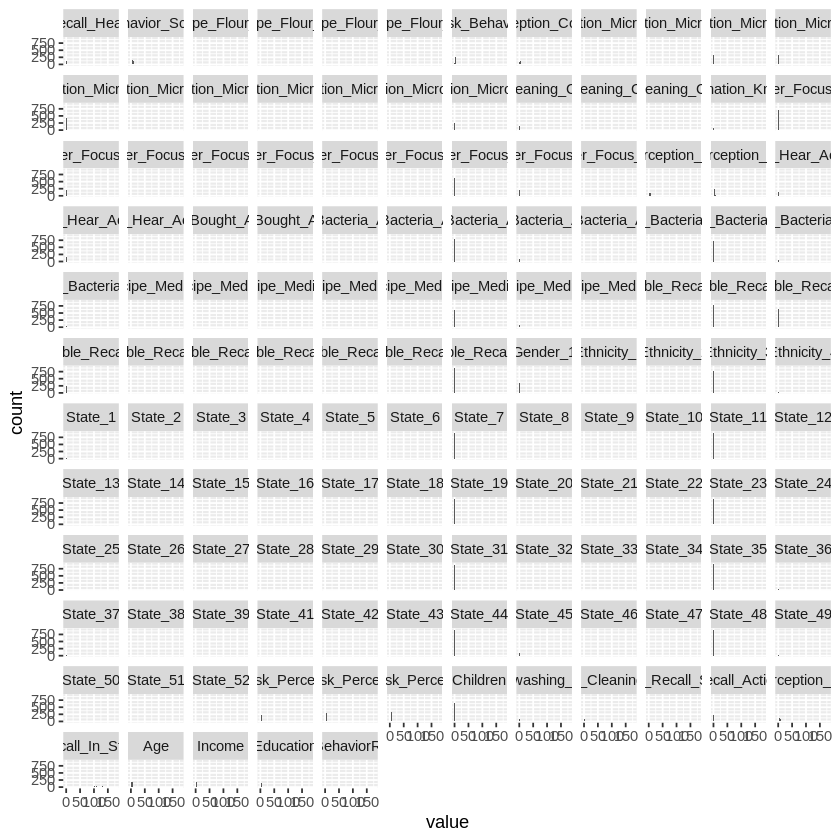

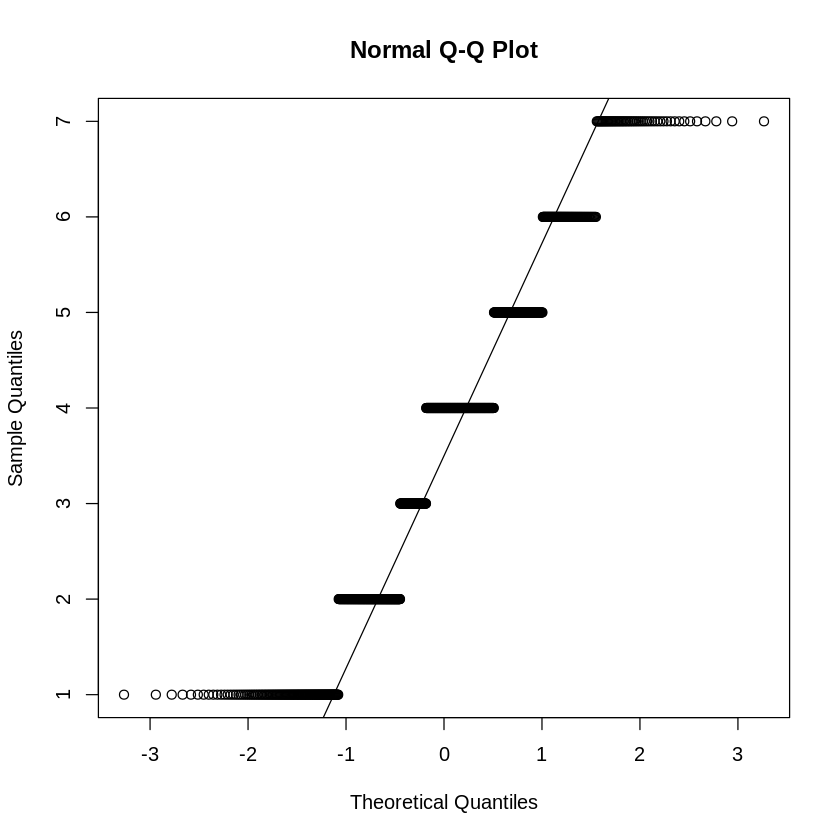

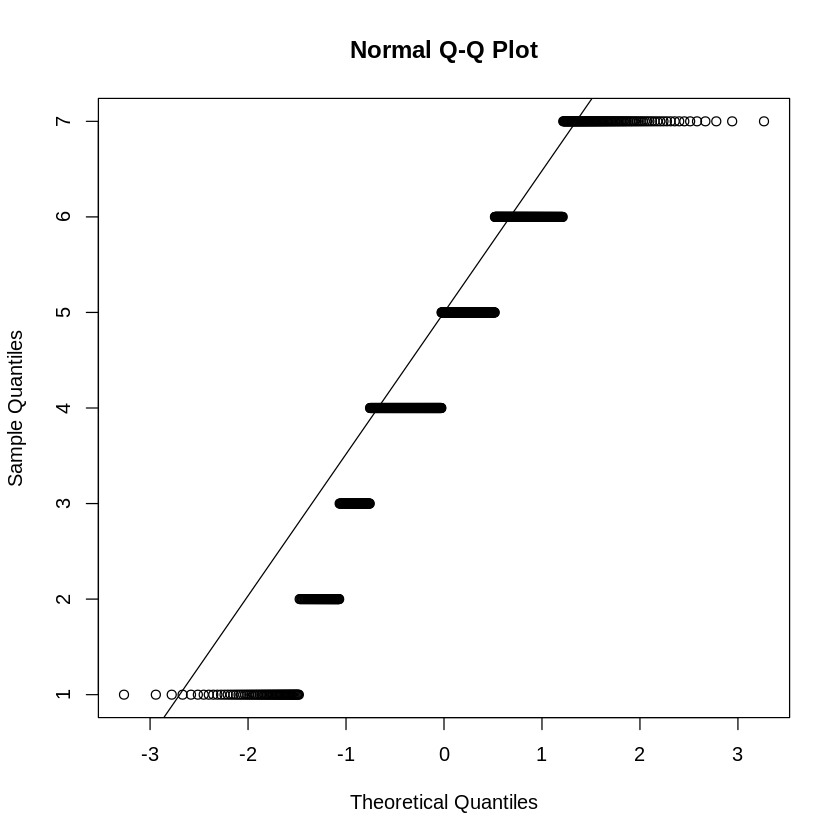

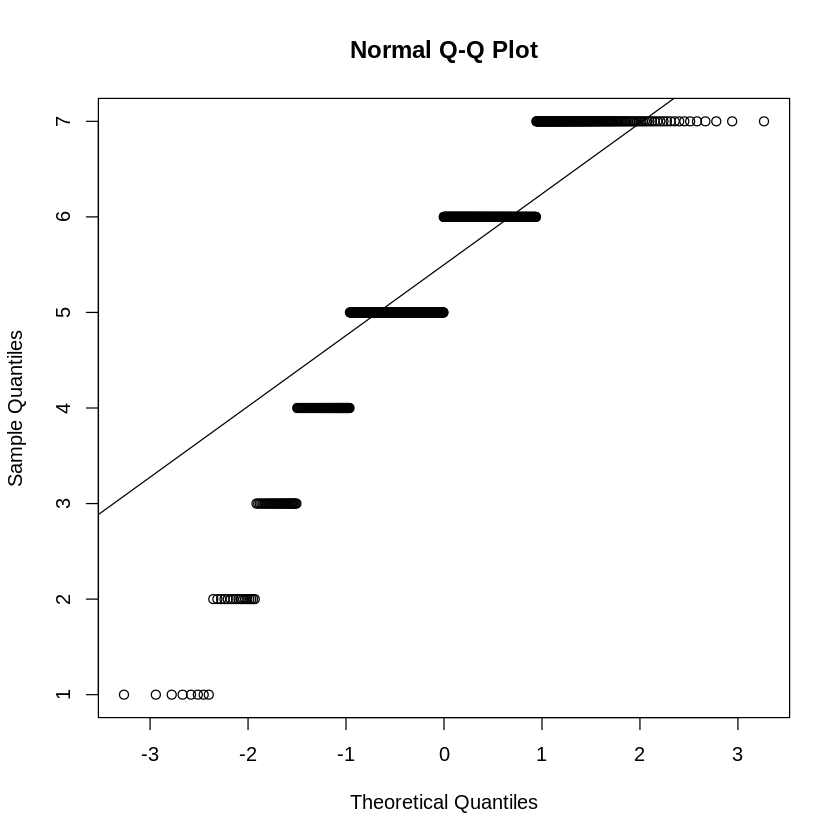

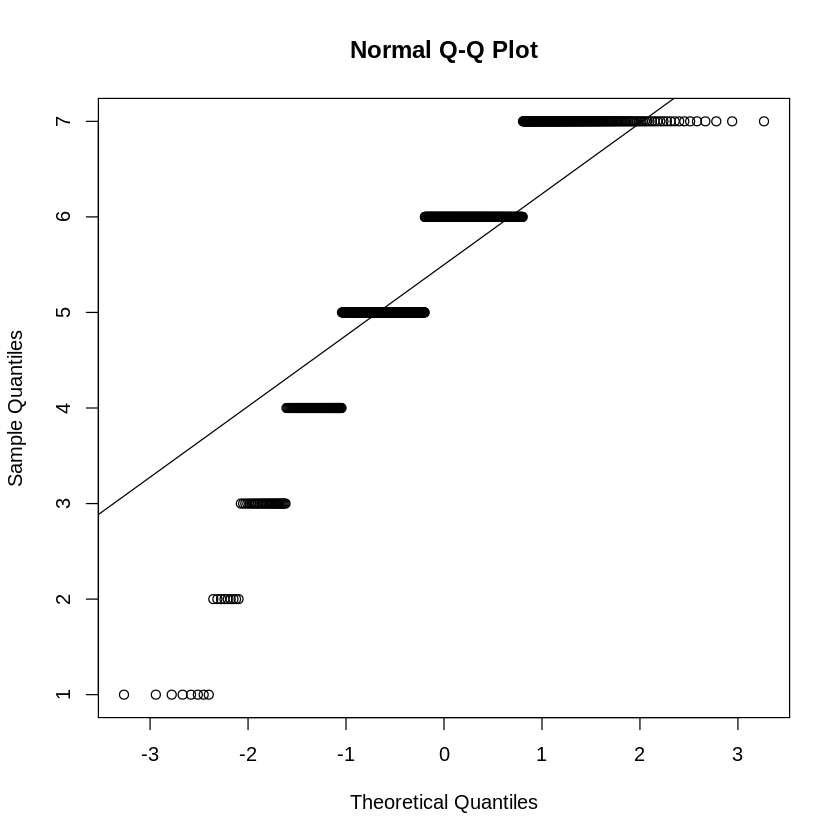

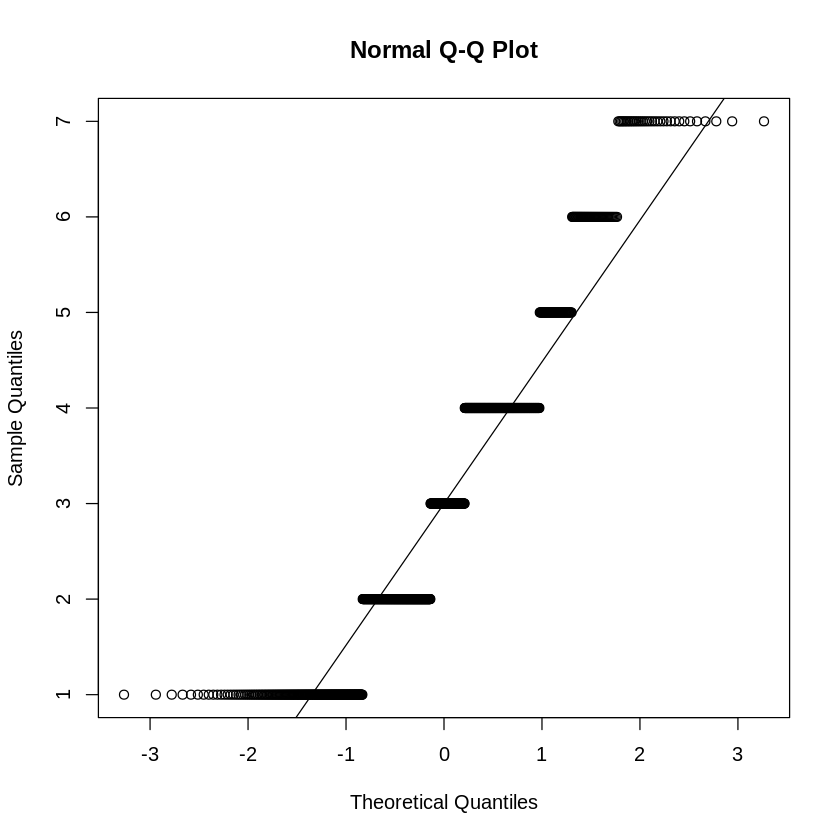

In [ ]:
install.packages("reshape2")
library(reshape2)
install.packages("ggplot2")
library(ggplot2)
#pairs(reg_data)
#There's an issue with the figure being too large, so the code is commented. This shouldn't change from previous investigation

reg_dataM <- melt(reg_data) # This is special code that turns the table into an indexable list of different variables. It's needed to restructure the data so it's compatible with some function calls coming up
hists <- ggplot(reg_dataM, aes(x=value)) + stat_count()+facet_wrap(~variable) #This is the first instance of GGplot. The first parameter is to declare what data or table should be used, the aes() is called the aesthetic function.
#The aesthetic function is used to declare what should be used in which axis, in this case x=value, so the values are on the x-axis. stat_count() tells the ggplot that we are mapping a bar plot with y-axis as the counts for the x-axis
#facet_wrap() is a function that tells the code to make multiple plots based on the specified value, in this case we used ~variable to tell it for each variable
hists # this will show the plots

#Risk Perception of Recalls are close to normal
qqnorm(reg_data$Risk_Perception_Recall_1)
qqline(reg_data$Risk_Perception_Recall_1)
#trimming the latter datapoints may help, but due to the nature of the ordinal variable, higher values and lower values COULD be possible.
#not normal and unlikely any transformation may help
qqnorm(reg_data$Self_Risk_Perception_1)
qqline(reg_data$Self_Risk_Perception_1)
#similar issue
qqnorm(reg_data$Self_Risk_Perception_2)
qqline(reg_data$Self_Risk_Perception_2)


#confident in this variable being considered normally distributed
qqnorm(reg_data$Self_Risk_Perception_3)
qqline(reg_data$Self_Risk_Perception_3)
#no optimal transformation
qqnorm(reg_data$Risk_Perception_Recall_2)
qqline(reg_data$Risk_Perception_Recall_2)

## Un-used data transformation

The data is not normal or linear in many variables. As such, I played around with options to solve the issue, one is to apply a box-cox transformation (look it up) . This approach is used to transform the data in a exponential transformation to make variables behave in a way that is approximately to normal. However, i do not use these calculated transformations in the variable as I decided it masks interpretability too much and is unnecessary.

The following is that exploration

In [ ]:
###This is not used, but kept for reference to reviewers

#no longer transforming data as it makes interpretation difficult
# #data can be transformed for better fit
# a<-reg_data$Self_Risk_Perception_2
# b<-a+1
# b<-log(b)
# c<-boxCox(lm(b~1), lambda = c(-5,5, by=0.5), optimize = TRUE)
# lambda = c$x[which.max(c$y)]
# lamba_self_risk_per_2 <- lambda
# #lambda = 3.38383838
# b<-(a^(lambda-1))/lambda
# qqnorm(b)
# qqline(b)

#data can be transformed for better fit
# a<-reg_data$Risk_Perception_Recall_2
# b<-a+1
# b<-log(b)
# c<-boxCox(lm(b~1), lambda = c(-5,5, by=0.5), optimize = TRUE)
# lambda = c$x[which.max(c$y)]
# lambda_risk_percep_recall_2 <- lambda
# #lambda is 1.060606060606
# b<-(a^(lambda-1))/lambda
# qqnorm(b)
# qqline(b)
#much better to normal


# qqnorm(reg_data$Behavior_Score)
# qqline(reg_data$Behavior_Score)
#boxcox transform may help
# a<-reg_data$Behavior_Score
# b<-log(a)
# c<-boxCox(lm(b~1), lambda=c(-5,5,by=0.5), optimize=TRUE)
# lambda = c$x[which.max(c$y)]
# #lambda = 3.1818181818
# b<-(a^(lambda-1))/lambda
# qqnorm(b)
# qqline(b)

#remember the lambda, so you can untransform when reading the predictions
#finalLambda = lambda

#implement the transformations
# reg_data$Self_Risk_Perception_2  <- (reg_data$Self_Risk_Perception_2^(2.3838383838))/3.3838383838
# reg_data$Risk_Perception_Recall_2  <- (reg_data$Risk_Perception_Recall_2^(0.060606060606))/1.060606060606
# reg_data$Behavior_Score <- (reg_data$Behavior_Score^(finalLambda-1))/finalLambda
#for the neural network, scaling from 0-1 is needed

# Feature Selection
Feature selection is the process of selecting "features" which are inputs, or independent variables in models. I call this variable selection in the manuscript. It's worth noting that a common theme is that one concept will have multiple names depending on the field, which is one challenge as there is no solid terms for our field. Just be aware if you learn that some concepts will have multiple names and even different nuances based on the discipline or philosophy of the approach.

Our approach is an exploratory predictive modeling approach. The goal is to go in with very little assumptions about what is being modeled. This may also give us the best approach to refine and create an accurate model. Though this is balanced with the fact that an accurate model isn't necessarily the most meaningful or informative model about the underlying mechanisms. However, a very accurate model with features supported as being important by other studies give reputability to the model as a whole and can inform about possibly new variables important to the behavior. THink of this as, shirt color might lead to accurate predictions about if it will rain through correlation, but humidity level from the previous day may have a more causaul relation or be involved in a complex interaction of a causal nature. Sometimes you can gain insight into other aspects of that complex interaction.

## Approach used
I used a simple statistical test based approach after weeding out variables for specific reasons.
1. Remove Variables used in calculations for other variables
2. Removed highly correlated variables
3. Removed variables with very low variability
4. Selected variables based off statistical tests

Removing variables involved in the calculaitons is important, as is removing other behavior related variables. Afterall, these variables can mask any meaningful interpretation beyond "These behaviors can predict other behaviors" which doesn't help when "these behaviors" are mysteries or unclear as to why on their own.

Removing highly correlated variables tend to have high colinearity effects and can sometimes bring execess or redundant informaiton into a model. Afterall if the model sees one of the variables being important, it will see the other as being important as well. This can also cause inaccuracies for values where it doesn't hold and even problems in interpretation. If a variable with high correlation to one of the other variables removed is important, we can already deduce that the removed variable is more or less as meaningful.

Issues this action addresses admittdly is not as important in the approaches we used, but in general it's good practice and may increase accuracy so it was done.

Removing variables with low variability (near-zero variance) is very important as well. In many cases with binary variables, they can be deemed important to a model since it can make a good seperator, but due to the nature of how the model works, this can be problematic as the minority class (least common value) is used as the basis for determinig if it's important or not. This is a small sample size. Additionally, these variables are almost constants anyways, which can give you another logical way of thinking if it is meaningful or not on it's own.

Selecting variables based off statistical tests is one common way to pick variables that are "informative". Informative variables have a meanginful relationship with the dependent variable. Afterall, if the two variables have a statsitical distinction i.e means are different statsitically between categories, or have some level of dependency, then it's likely able to be used to inform or predict values on the dependent variable.
I used a series of pair-wise wilcoxian tests (a form of a kruskal-wallis, which both are non-parametric median/ mean comparions)  to see if different categories of some the categorical or binary variables had different mens of the predicted behaviors. I.e if males had a different mean behavior score than females. For comparing continuous variables, i used the discrete values of the behavior score to see if the continuous variable's means were different among them.


**When using this as a template, adjustment is needed to ensure that the predicted variable being used is correct. Codes that need to be changed will be noted in the code**

## Remove Correlated variables, other behaviors, and low variance variables

---



> Indented block



In [ ]:
install.packages("dplyr")
library(dplyr)
# Remove variables
reg_data <- subset(reg_data, select = -Risk_Perception_Recall_1)
reg_data <- subset(reg_data, select = -Self_Risk_Perception_3)
reg_data <- subset(reg_data, select = -Responsible_Recall_Risk_7)
reg_data <- subset(reg_data, select = -Hear_Recall_Score) # Behavior
reg_data <- subset(reg_data, select = -Handwashing_Score) # Behavior
reg_data <- subset(reg_data, select = -Counter_Cleaning_Score) #Behavior
reg_data <- subset(reg_data, select = -Recall_Action) # behavior
reg_data <- subset(reg_data, select = -Type_Cleaning_Counter2) #Behavior
reg_data <- subset(reg_data, select = -Recall_Bought_Action_2) #Behavior
reg_data <- subset(reg_data, select = -Recall_Hear_Action_4)#Behavior
#reg_data <- subset(reg_data, select = -Risk_Behavior)#Behavior
reg_data <- subset(reg_data, select = -Risk_BehaviorRecode)#Behavior
reg_data <- subset(reg_data, select = -Type_Flour_4)#Behavior
reg_data <- subset(reg_data, select = -State_2) # This is removed due to 0 variance

reg_data <- subset(reg_data, select = -Behavior_Score)

#Create New Variable For Recall Behavior
#reg_data <- reg_data %>% mutate(Hygiene_Behavior = Counter_Cleaning_Score + Handwashing_Score )

#reg_data <- subset(reg_data,select = -Counter_Cleaning_Score) #Behavior
#reg_data <- subset(reg_data,select = -Handwashing_Score) #Behavior

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Statistical Tests

The two tests used are again, chi-sqaured tests with binary data.


### the %>% Operator

The %>% is known as the pipe operator. It is associated with a set of packages from the tidyverse packages. You can best think of this being read as  "And then". You do the first action on the left,
"and then" take that as the input for what is being done on the right side. This can grammatically save time, but is also necessary for several commands. This will be used along with %in%, which means to apply the right side to the left list of values

### Indexing lists and tables

To index values from a list or table, there are several different methods. By default, you can use array notion of [Row,Column] You use numbers which refer to the index for each. So to select the third row and third column from a table you use  [3,3]. To select the whole set of rows or columns, you use [,C] or [R,] for row or column. The blank space means all values. However, what's worth noting is the data type returned. This will return a data frame, which some functions do not take. Instead [[ , ]] is used. This will return the output as a vector of values. Keep in mind, there exists a data type such as lists, which are also used in this following section. These are single dimension containers of data and are only indexed via [[ ]] or [  ]

In [ ]:
library(dplyr)

#however, first due to large variable space, feature selection is necessary. An filter approach of Chi-sqaure and ANOVA on the features will identify variables dependnent with the output
binary_data_1 <-(reg_data%>%select_if(~all(. %in% 0:1))) #This line of code looks through the dataset and finds binary variables, and assigns them to a table as binary_data_1\

#Exploring the operators. You first take the reg_data table, and then, you select from it IF all values from a variables are IN the range of 0 to 1. 0:1 indicates a range.
# The ~ represents a formula set, formula is a different syntax where you can refer to variable columns by just their name. The '.' has a special meaning in a formual context as a short hand
#for ALL variables
#The all(), means you are inlcuding all the results from within the function.
#This is a complex set of logic and function that would take several loops done in a single line, this is the true power of dplyr


binary_data_1 <- as.matrix(binary_data_1)
binary_data_1 <- as.table(binary_data_1) #this converts the dataframe into a table, required to call CrossTable
colNum <-  ncol(binary_data_1) #Need to set up for loop
tables <- list()

for(col in 1:colNum){
  intermediate <- CrossTable(reg_data$Risk_Behavior, binary_data_1[,col], chisq = TRUE)
  tables <- append(tables,list(intermediate),col)
}
#Tables are cross tabs with each table being compared to the heard recall outcome and chi-sqaured for independence test.
#Take all indices that are statistically significant
colNum <- length(tables)
count <- 1
indexs <- list()
for(col in 1:colNum){
  if(tables[[col]]$chisq$p.value <= 0.05){
    indexs<- append(indexs, col, count)
    count <- count+1
  }
}

binary_data_1 <-(reg_data%>%select_if(~all(. %in% 0:1))) #This line is very important. Some reason, converting the binaray_data_1 as a table back to a data frame will convert to a 2 column form wiht the variable as a factor
newData.1 <- binary_data_1[, as.numeric(indexs) ] #Select the binary variables that were statistically significant. This calls all variables from binary_data_1 whose column indices matches those from the list
newData.1 <- sapply(newData.1, as.logical) #This converts these binary variables to logical ones, this is to protect the data types and prevent mishanlding,

#now anova on the ordinal or continuous variables
contin_Vars <- (reg_data%>%select_if(~!all(. %in% 0:1))) # This selects the inverse of the binary variables, which in this case are continuous as previously all categorical data was encoded as binary variables
#Note the ! in ~!all . This will return the reverse of the function. Effectively ~all(. %in% 0:1) reuturns an array of true or false values associated with each index of the variable. The ! will invert true
#and false. Then the select_if will select the trues after that inversion


#This section shows a table of the means by the behavior_score values
reg_data %>%
select_if(~!all(. %in% 0:1)) %>%
dplyr::group_by(Risk_Behavior) %>%  #This function group_by will group values together based on a variable value specified. Also note the dplyr:: , this is a way to make sure you directly select a package
dplyr::summarise(across(everything(), list(mean)))  #summarise will output a table with the group-by in place, however you need to specify what is shown. IN this case across all variable (across everything)
# You will create a list of means that will then be displayed. Everything() is known as a void function, it takes no direct input as a parameter (or only uses default)
#, but will implicitly act in it's context to make a change

#The output shows the means for each continuous variables within each behavior score value

colNum <- ncol(contin_Vars) - 1
count <- 1
indexs_2 <- list()

for(col in 1:(colNum)){
intermediate <- kruskal.test(contin_Vars[,col+1]~ Risk_Behavior, data = contin_Vars) # note the ~ , kruskal.test by default uses a formula for it's input, the ~ is used in the formula context to denote
    #where the dependent and independent variables begin. In this case, a model is built for the continuious variable with behavior score as the independent.

    print(intermediate)
  if(intermediate$p.value <= 0.051){    #0.051 because of possible inaccuracies with P-value estimates and rounding errors
   indexs_2<- append(indexs_2, col+1, count) #add significant variables to the model
   count <- count+1
  }
}

newData.2 <- contin_Vars[,as.numeric(indexs_2)] #This will select the coninuous variable
newData <- cbind(as.data.frame(newData.1), newData.2) #Create the new data0set



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.664 |     3.813 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.047 |     0.007 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       265 |        29 |       294 | 
                       |     0.852 |     4.891 |           | 
                       |     0.901 |     0.099 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        10 |        28 |        38 | 
                       |     8.685 |     1.039 |           | 
                       |     0.263 |     0.737 |     0.041 | 
                       |     0.102 |     0.034 |           | 
                       |     0.011 |     0.031 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |        31 |       263 |       294 | 
                       |     0.006 |     0.001 |           | 
                       |     0.105 |     0.895 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        35 |         3 |        38 | 
                       |     0.162 |    11.245 |           | 
                       |     0.921 |     0.079 |     0.041 | 
                       |     0.039 |     0.231 |           | 
                       |     0.038 |     0.003 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       291 |         3 |       294 | 
                       |     0.005 |     0.327 |           | 
                       |     0.990 |     0.010 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.157 |     2.362 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.044 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       275 |        19 |       294 | 
                       |     0.002 |     0.029 |           | 
                       |     0.935 |     0.065 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        36 |         2 |        38 | 
                       |     0.025 |     0.897 |           | 
                       |     0.947 |     0.053 |     0.041 | 
                       |     0.040 |     0.080 |           | 
                       |     0.039 |     0.002 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       289 |         5 |       294 | 
                       |     0.032 |     1.134 |           | 
                       |     0.983 |     0.017 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        34 |         4 |        38 | 
                       |     0.001 |     0.009 |           | 
                       |     0.895 |     0.105 |     0.041 | 
                       |     0.041 |     0.043 |           | 
                       |     0.037 |     0.004 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       256 |        38 |       294 | 
                       |     0.273 |     2.452 |           | 
                       |     0.871 |     0.129 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        33 |         5 |        38 | 
                       |     0.213 |     3.410 |           | 
                       |     0.868 |     0.132 |     0.041 | 
                       |     0.038 |     0.093 |           | 
                       |     0.036 |     0.005 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       275 |        19 |       294 | 
                       |     0.010 |     0.164 |           | 
                       |     0.935 |     0.065 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.055 |     0.820 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.043 |     0.017 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       262 |        32 |       294 | 
                       |     0.652 |     9.663 |           | 
                       |     0.891 |     0.109 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        34 |         4 |        38 | 
                       |     0.183 |     4.765 |           | 
                       |     0.895 |     0.105 |     0.041 | 
                       |     0.039 |     0.118 |           | 
                       |     0.037 |     0.004 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       285 |         9 |       294 | 
                       |     0.013 |     0.331 |           | 
                       |     0.969 |     0.031 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.191 |     1.844 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.045 |     0.012 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       267 |        27 |       294 | 
                       |     0.001 |     0.012 |           | 
                       |     0.908 |     0.092 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        30 |         8 |        38 | 
                       |     0.880 |    13.031 |           | 
                       |     0.789 |     0.211 |     0.041 | 
                       |     0.035 |     0.138 |           | 
                       |     0.033 |     0.009 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       276 |        18 |       294 | 
                       |     0.001 |     0.019 |           | 
                       |     0.939 |     0.061 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.092 |     1.823 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.044 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       279 |        15 |       294 | 
                       |     0.003 |     0.057 |           | 
                       |     0.949 |     0.051 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        36 |         2 |        38 | 
                       |     0.260 |     1.742 |           | 
                       |     0.947 |     0.053 |     0.041 | 
                       |     0.045 |     0.017 |           | 
                       |     0.039 |     0.002 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       249 |        45 |       294 | 
                       |     0.183 |     1.229 |           | 
                       |     0.847 |     0.153 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.193 |     2.611 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.044 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       267 |        27 |       294 | 
                       |     0.169 |     2.290 |           | 
                       |     0.908 |     0.092 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.032 |     0.555 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.043 |     0.020 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       285 |         9 |       294 | 
                       |     0.178 |     3.083 |           | 
                       |     0.969 |     0.031 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        33 |         5 |        38 | 
                       |     0.258 |     4.784 |           | 
                       |     0.868 |     0.132 |     0.041 | 
                       |     0.038 |     0.106 |           | 
                       |     0.036 |     0.005 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       278 |        16 |       294 | 
                       |     0.003 |     0.058 |           | 
                       |     0.946 |     0.054 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.002 |     0.124 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.041 |     0.059 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.041 |     2.184 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.022 |     0.912 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       288 |         6 |       294 | 
                       |     0.004 |     0.157 |           | 
                       |     0.980 |     0.020 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.002 |     0.249 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.000 |     0.003 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        33 |         5 |        38 | 
                       |     0.041 |     0.370 |           | 
                       |     0.868 |     0.132 |     0.041 | 
                       |     0.040 |     0.054 |           | 
                       |     0.036 |     0.005 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       264 |        30 |       294 | 
                       |     0.001 |     0.009 |           | 
                       |     0.898 |     0.102 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.008 |     0.539 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       288 |         6 |       294 | 
                       |     0.012 |     0.805 |           | 
                       |     0.980 |     0.020 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.006 |     0.395 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.041 |     0.077 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       291 |         3 |       294 | 
                       |     0.005 |     0.327 |           | 
                       |     0.990 |     0.010 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.041 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.041 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.000 |     0.321 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.041 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.041 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.000 |     0.321 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        36 |         2 |        38 | 
                       |     0.053 |     0.548 |           | 
                       |     0.947 |     0.053 |     0.041 | 
                       |     0.043 |     0.025 |           | 
                       |     0.039 |     0.002 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       268 |        26 |       294 | 
                       |     0.000 |     0.000 |           | 
                       |     0.912 |     0.088 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.000 |     0.002 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.041 |     0.043 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       289 |         5 |       294 | 
                       |     0.020 |     0.764 |           | 
                       |     0.983 |     0.017 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.124 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.003 |     0.962 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.124 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.004 |     1.121 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        35 |         3 |        38 | 
                       |     0.056 |     1.290 |           | 
                       |     0.921 |     0.079 |     0.041 | 
                       |     0.040 |     0.079 |           | 
                       |     0.038 |     0.003 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       287 |         7 |       294 | 
                       |     0.095 |     2.205 |           | 
                       |     0.976 |     0.024 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.020 |     0.870 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       287 |         7 |       294 | 
                       |     0.000 |     0.011 |           | 
                       |     0.976 |     0.024 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.005 |     0.414 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       290 |         4 |       294 | 
                       |     0.002 |     0.197 |           | 
                       |     0.986 |     0.014 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.005 |     0.414 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.005 |     0.454 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.004 |     0.230 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.041 |     0.067 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       287 |         7 |       294 | 
                       |     0.017 |     0.998 |           | 
                       |     0.976 |     0.024 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        36 |         2 |        38 | 
                       |     0.070 |     7.098 |           | 
                       |     0.947 |     0.053 |     0.041 | 
                       |     0.040 |     0.222 |           | 
                       |     0.039 |     0.002 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       293 |         1 |       294 | 
                       |     0.012 |     1.232 |           | 
                       |     0.997 |     0.003 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.002 |     0.290 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       291 |         3 |       294 | 
                       |     0.002 |     0.254 |           | 
                       |     0.990 |     0.010 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        36 |         2 |        38 | 
                       |     0.040 |     1.868 |           | 
                       |     0.947 |     0.053 |     0.041 | 
                       |     0.040 |     0.105 |           | 
                       |     0.039 |     0.002 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       288 |         6 |       294 | 
                       |     0.000 |     0.001 |           | 
                       |     0.980 |     0.020 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        36 |         2 |        38 | 
                       |     0.054 |     3.475 |           | 
                       |     0.947 |     0.053 |     0.041 | 
                       |     0.040 |     0.143 |           | 
                       |     0.039 |     0.002 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       290 |         4 |       294 | 
                       |     0.001 |     0.053 |           | 
                       |     0.986 |     0.014 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.045 |     1.285 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.043 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       288 |         6 |       294 | 
                       |     0.055 |     1.561 |           | 
                       |     0.980 |     0.020 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.008 |     0.650 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.041 |     0.091 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       288 |         6 |       294 | 
                       |     0.021 |     1.735 |           | 
                       |     0.980 |     0.020 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.001 |     0.166 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       293 |         1 |       294 | 
                       |     0.000 |     0.062 |           | 
                       |     0.997 |     0.003 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.017 |     0.787 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       289 |         5 |       294 | 
                       |     0.004 |     0.196 |           | 
                       |     0.983 |     0.017 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.083 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.001 |     0.641 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.124 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.003 |     0.962 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.007 |     0.508 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.041 |     0.083 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.051 |     3.847 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.001 |     0.207 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.001 |     0.098 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.002 |     0.063 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.042 |     0.032 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       284 |        10 |       294 | 
                       |     0.000 |     0.000 |           | 
                       |     0.966 |     0.034 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        35 |         3 |        38 | 
                       |     0.178 |    16.133 |           | 
                       |     0.921 |     0.079 |     0.041 | 
                       |     0.039 |     0.300 |           | 
                       |     0.038 |     0.003 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.005 |     0.454 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        35 |         3 |        38 | 
                       |     0.018 |     0.294 |           | 
                       |     0.921 |     0.079 |     0.041 | 
                       |     0.041 |     0.057 |           | 
                       |     0.038 |     0.003 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       270 |        24 |       294 | 
                       |     0.177 |     2.890 |           | 
                       |     0.918 |     0.082 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        37 |         1 |        38 | 
                       |     0.001 |     0.034 |           | 
                       |     0.974 |     0.026 |     0.041 | 
                       |     0.042 |     0.034 |           | 
                       |     0.040 |     0.001 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       281 |        13 |       294 | 
                       |     0.048 |     1.474 |           | 
                       |     0.956 |     0.044 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.083 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       293 |         1 |       294 | 
                       |     0.000 |     0.201 |           | 
                       |     0.997 |     0.003 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.080 |     1.699 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.043 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       282 |        12 |       294 | 
                       |     0.005 |     0.100 |           | 
                       |     0.959 |     0.041 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.003 |     0.332 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       290 |         4 |       294 | 
                       |     0.007 |     0.803 |           | 
                       |     0.986 |     0.014 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.007 |     0.497 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       290 |         4 |       294 | 
                       |     0.000 |     0.006 |           | 
                       |     0.986 |     0.014 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.072 |     1.616 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.043 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       281 |        13 |       294 | 
                       |     0.001 |     0.020 |           | 
                       |     0.956 |     0.044 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.001 |     0.166 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.006 |     1.282 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.009 |     0.580 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       288 |         6 |       294 | 
                       |     0.008 |     0.509 |           | 
                       |     0.980 |     0.020 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.041 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.041 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.000 |     0.321 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        35 |         3 |        38 | 
                       |     0.132 |     6.218 |           | 
                       |     0.921 |     0.079 |     0.041 | 
                       |     0.039 |     0.158 |           | 
                       |     0.038 |     0.003 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       288 |         6 |       294 | 
                       |     0.000 |     0.001 |           | 
                       |     0.980 |     0.020 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        35 |         3 |        38 | 
                       |     0.005 |     0.047 |           | 
                       |     0.921 |     0.079 |     0.041 | 
                       |     0.042 |     0.037 |           | 
                       |     0.038 |     0.003 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       260 |        34 |       294 | 
                       |     0.222 |     2.261 |           | 
                       |     0.884 |     0.116 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.002 |     0.290 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.000 |     0.027 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.000 |     0.041 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.041 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       294 |         0 |       294 | 
                       |     0.000 |     0.321 |           | 
                       |     1.000 |     0.000 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.022 |     0.912 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       286 |         8 |       294 | 
                       |     0.003 |     0.127 |           | 
                       |     0.973 |     0.027 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        36 |         2 |        38 | 
                       |     0.037 |     1.655 |           | 
                       |     0.947 |     0.053 |     0.041 | 
                       |     0.040 |     0.100 |           | 
                       |     0.039 |     0.002 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       289 |         5 |       294 | 
                       |     0.007 |     0.311 |           | 
                       |     0.983 |     0.017 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.001 |     0.207 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       292 |         2 |       294 | 
                       |     0.001 |     0.098 |           | 
                       |     0.993 |     0.007 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.007 |     0.497 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       289 |         5 |       294 | 
                       |     0.005 |     0.345 |           | 
                       |     0.983 |     0.017 |     0.321 | 
                

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                       | binary_data_1[, col] 
reg_data$Risk_Behavior |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |        38 |         0 |        38 | 
                       |     0.007 |     0.497 |           | 
                       |     1.000 |     0.000 |     0.041 | 
                       |     0.042 |     0.000 |           | 
                       |     0.041 |     0.000 |           | 
-----------------------|-----------|-----------|-----------|
                     1 |       289 |         5 |       294 | 
                       |     0.005 |     0.345 |           | 
                       |     0.983 |     0.017 |     0.321 | 
                

Risk_Behavior,Risk_Perception_Consumption_1,Contamination_Knowledge_1,Risk_Perception_Recall_2_1,Self_Risk_Perception_1_1,Self_Risk_Perception_2_1,Risk_Perception_Microbes_1,Recall_In_State_1,Age_1,Income_1,Education_1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.0000000,2.000000,2.894737,4.315789,4.736842,6.447368,104.1842,4.157895,3.157895,2.710526
1,0.8061224,2.197279,2.921769,4.374150,5.571429,6.850340,108.0408,4.190476,3.197279,2.551020
2,4.1220657,2.065728,2.934272,4.338028,5.333333,5.971831,106.1784,3.826291,3.469484,2.615023
3,3.7016129,1.951613,3.274194,4.580645,5.354839,5.153226,110.2339,2.983871,3.564516,2.673387
4,3.6854839,2.032258,3.282258,4.879032,5.435484,5.040323,114.7903,3.024194,3.379032,2.846774



	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Risk_Behavior
Kruskal-Wallis chi-squared = 442.7, df = 4, p-value < 2.2e-16


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Risk_Behavior
Kruskal-Wallis chi-squared = 8.5162, df = 4, p-value = 0.0744


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Risk_Behavior
Kruskal-Wallis chi-squared = 5.7376, df = 4, p-value = 0.2196


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Risk_Behavior
Kruskal-Wallis chi-squared = 12.788, df = 4, p-value = 0.01236


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Risk_Behavior
Kruskal-Wallis chi-squared = 17.671, df = 4, p-value = 0.001431


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Risk_Behavior
Kruskal-Wallis chi-squared = 64.6, df = 4, p-value = 3.125e-13


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Risk_Behavior
Kruskal-Wallis chi-squared = 3.8392, df = 4, p-value = 0.4282


	

## Re-add Recalls In State and Predicted Variables

Some cases, the number of recalls in the state where the consumer lives is removed from the models in this process. As it is part of our investgation, it should be readded.


In [ ]:
install.packages("stringr")
library(stringr)
if(!any(colnames(newData) %>% str_detect("Recall_In_State"))){ #This code checks for if recall in stat exists as a variable for the data going to be used. If not (the !), then add it
newData <- cbind(newData, reg_data$Recall_In_State) # Add the variable
newData.2 <- cbind(newData.2,reg_data$Recall_In_State )
names(newData)[length(names(newData))] <- "Recall_In_State"
names(newData.2)[length(names(newData.2))] <- "Recall_In_State" # Rename it since by default it uses a different name
}

### Change this section to add the predicted variable again
newData <- cbind(newData, reg_data$Risk_Behavior) #make sure to change behavior score to the new predicted variable here and the next row
names(newData)[length(names(newData))] <- "Risk_Behavior"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




# Data Transformation and Preparation
Data transformation, also known as data manipulation to some schools of data analysts, is the process of modifying and changing varaibles to meet your needs of analysis. I did the following

1. Rescale values to 0-1.

Other stuides may do more like normalizing, which is to make the values Z-score values and unitless. I did not as i feel this is too manipulative of the data.
Re-ranging the data can lead to more accurate models and can prevent different orders of magnitudes from affecting the variables or model.



I start by checking the ranges of the values in independent variables, then i do math to adjust their values

**When changing be sure to comment and uncomment or add stuff as needed. Make sure to re-range the predicted variable**



# Range of Continuous Variables

In [ ]:
t(sapply(newData.2,range)) #This is code to apply a function called range(), which returns the range of values for a variable, to all variables in newData.2, continuous variables in our model


Risk_Perception_Consumption,0,7
Self_Risk_Perception_1,1,7
Self_Risk_Perception_2,1,7
Risk_Perception_Microbes,0,11
Age,1,6
Income,1,5
Education,1,4
Recall_In_State,0,180


# New Dataset and Re-range the data

In [ ]:

#Scale the data for neural network
nNet_data <- newData #Create a new set of data for transforming the range

nNet_data$Self_Risk_Perception_1 <- (nNet_data$Self_Risk_Perception_1-1)/6
nNet_data$Self_Risk_Perception_2 <- (nNet_data$Self_Risk_Perception_2-1)/6
#nNet_data$Risk_Perception_Recall_2 <- (nNet_data$Risk_Perception_Recall_2-1)/6
#nNet_data$Contamination_Knowledge <- nNet_data$Contamination_Knowledge/3
nNet_data$Risk_Perception_Microbes <- (nNet_data$Risk_Perception_Microbes-1)/10
#nNet_data$Recall_Action <- (nNet_data$Recall_Action+1) /3
#nNet_data$Counter_Cleaning_Score <- nNet_data$Counter_Cleaning_Score/2
#nNet_data$Hear_Recall_Score <- (nNet_data$Hear_Recall_Score+1)/2
#nNet_data$Risk_Behavior <- nNet_data$Risk_Behavior/4
nNet_data$Risk_Perception_Consumption <- nNet_data$Risk_Perception_Consumption-1/6
#nNet_data$Handwashing_Score <- nNet_data$Handwashing_Score/2
nNet_data$Recall_In_State <- nNet_data$Recall_In_State-1/179
nNet_data$Age <- (nNet_data$Age-1)/5
nNet_data$Education <- (nNet_data$Education-1)/3
#nNet_data$Hygiene_Behavior <- (nNet_data$Hygiene_Behavior)/4
nNet_data$Income <- (nNet_data$Income-1)/4

#Ensure the predicted variable is scaled
nNet_data$Risk_Behavior <- nNet_data$Risk_Behavior/4

# Begin Modeling




The code section is divided into the following sections

1. Initalize Variables
2. Begin Loop
3. Create Partition
4. Create Model
5. Extract important values
6. End Loop

I create a bunch of variables, many of which are lists, as these will be used in the section. Of note is the small list of *seed*. This contains the seeds used for the final models so it can be repeated. Seeds are numbers that define the starting point for random number generations. By defining a seed, things that are done "at random" can be done "at random" the same way each time.

**There are sections of codes that need to be commented and uncommented to swap between final models and model optimizations**

I create a loop through these seeds for the final models. There is alternative code in comments. This one will loop through a long list of seeds sequentially. This is how we optimize the model. Time should be spent optimizing the models. You can run the model in the background for 24 hours at least. Do make sure to check in on the program, as depending on Ram, it can crash. Not sure about how it performs on Kaggle, but at minimum you'd have the model loop thorugh iterations for 24 hours. Though ideally it would be 72 hours just so it can find the highest performing models.Additionally, you'll need to input values for the RMSE and Seeds that are made up or fake to initalize things. THis way the algorithim can function. (i.e RMSEs <- c(1000,10000,20000,100000, 200000) and seeds <- c(1,2,3,4,5))

The data paritioning is done as a 70/30 split, with 30% of the data being set aside to validate the model. This is the predictive philosophy for modeling. There is a few hundread data points that the model has never seen (i.e not used to build or train the model), and they will be plugged into the model to make the predictions which are compared. This split is done at random to prevent bias, but this means different models can be built from the same set of data.

Additionally, a cross validation is created. This will be explained later

The next step is creating the models. In the case of the new models, they will be continuous predicted/dependent variables. This means that we will only have two types of models, Random Forest Regression, and Neural Networks. I will not go into depth on these, if you want to learn more, look up CART Random Forest Regression, and Monolayer Perceptron/Neural Network. What's important to know is both involve randomness which is why differnt seeds are important.

I use CaretList, which creates multiple models at once, and then combine with CaretEnsemble which uses a CaretList as inputs to build a new model, by default it is a linear regression, which is a weighed mean (take some time to think about it). Each model's output is assigned a coefficent (or weight), which are both then added together. You can ignore the division by two as it can be split between the weights.

One of the other things involved is the cross-fold validation. This process involves splitting the training data even further. It randomly created N-partions that you specify, in this case 10. The models are built N times, each time, one of these partitions are left out and the models are evaluated, such that it goes through and builds the model such that there is one version with each partition being left out. The resulting models are averaged together to create a single result. This of course also involves more randomness.

After the models are built, calculaitons are done to enable predictions and performance measures with the testing data set. Also other model accuracy related values such as RMSE (Root Mean Squared Error) and R^2 are extracted. Additionally, the top important variables for each model are extracted. Lastly, values for the PDPs are calculated and extracted for later. However, this section needs to be changed for the final models after you have identified the top predicting variables.

Then we end the loop and repeat. There is another section for model optimization. It looks at the existing RMSEs and compares it to the model's RMSE to see if it is lower than any existing models. If it is, it'll assign it to where it fits in the order from lowest to highest.

**To use the template, the steps should be**
1. **Optimize the models**
2. **Collect and extract the top important features from the optimized models by running the model in the final model form and the feature extraction section**
3. **Update the PDP code in the Create Model Section and PDP section**
4. **Run the final model, feature importance, and PDP section**



# The first block of code is for optimizing. This should be ran and cut after 72 hours

In [ ]:

count <- 1
RSQSD<-list()
RSQU <-list()
nNet_Errors <- list()
rf_Errors <- list()
azs <- list()
bzs <- list()
czs <- list()
cforest <- list()
network <- list()
logregression <- list()
ensemble <- list()
importances <- list()
model_ensembles <- list()
Names_list <- list()
Names_list_overall <- list()
Names_list_cforest <- list()
Names_list_nNet <- list()
Importance_overall <- list()
Importance_cforest <- list()
Importance_nNet <- list()
PredictedValues <- list()


#Initalize the variables
seeds <-c(2011,1778,1670,1672,1142)
rmses <-c( 0.04611189, 0.04629264 ,0.04632545 ,0.04633449, 0.04635748)

num <-1 #initalize the varaible, for the inital seed for variable seperation
### Important decision, the training and testing seperation is not actually used for predicting the performance... Instead the CV's Rmse is used. Should i drop this parition. Or use it as a testing, training and validation
#https://machinelearningmastery.com/difference-test-validation-datasets/ This is one to get an idea. I suggest calculating an RMSE using the split. But this split is done before. We roll a 100000
#https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79#:~:text=Model%20accuracy%20varies%20depending%20on,are%20large%20enough%20to%20matter.
# Keep the RMSE selection based on the C-fold validation, but add an RMSE


  seed_value <- num
  set.seed(seed_value) #This is used to set the random number generator's seed
  #partition data at random, creating a testing and training
  inTrainingNnet <- createDataPartition(nNet_data$Hygiene_Behavior, p =0.7, list=FALSE) # Update Behavior_Score to new predicted variable
  #inTrainingNnet is a column variable of indexes. Meaning it can be used to subset the data for training and testing as below
  trainingnNet <- nNet_data[ inTrainingNnet,]
  testingnNet <- nNet_data[-inTrainingNnet,]



  for(num in 2500:5000){ #Begin a loop where it will iterate through different seeds for the model
    seed_value <- num
  set.seed(seed_value) #This is used to set the random number generator's seed

  #setup the 10 fold cross validation control
  crossFold  <- trainControl(method = "cv", number = 10 , savePredictions =  "final")
  models <- caretList(Risk_Behavior~., data=trainingnNet, trControl = crossFold ,   methodList = c("cforest" , "nnet" ), metric = "RMSE" ) # Update Behavior_Score to new predicted variable
  #This creates the models for cforest and nnet

  #build the models
 #preds <- as.data.frame(predict(models, newdata = testingnNet)) #This will redurn a
 #pred <- predict(models, newdata = testingnNet)

  model_ensemble <- caretEnsemble(models, metric = "RMSE", trControl = crossFold) #This creates the ensmble for the final prediction.
  model_ensembles[[count]] <- model_ensemble #add it to the list of models

  importan <- varImp(model_ensemble) #This returns what is important for the models, this is a list of the cforest and nnet
  model_preds <- lapply(models, predict, newdata=testingnNet ) #This returns a list of predictions for each of the models (cforest and nnet)

  model_preds <- data.frame(model_preds) #convert the sturcture of the data
  ens_preds <- predict(model_ensemble, newdata=testingnNet)
  model_preds$ensemble <- ens_preds

  importan <- as.table(as.matrix(importan))
  import_names <- row.names(importan)[(nrow(importan)-2):nrow(importan)]
  count2 <- 1

while(count2 <6 ){
  if(rmses[[count2]] > model_ensemble$error$RMSE){
  #Note that a replacement was made
    if(count2 <5){
      count3 <- 5
      while(count3 > count2 ){
      rmses[[count3]] <- rmses[[count3-1]]
      seeds[[count3]] <-seeds[[count3-1]]
      count3 <-count3-1
      }
      rmses[[count2]]<-model_ensemble$error$RMSE
      seeds[[count2]]<- seed_value
      count2=6
    }
    else{
      rmses[[count2]]<-model_ensemble$error$RMSE
      seeds[[count2]]<- seed_value
    }


  }
  count2 <-count2+1
  }
}

ERROR: Error in createDataPartition(nNet_data$Risk_Behavior, p = 0.7, list = FALSE): could not find function "createDataPartition"


## This should be ran after optimization

In [ ]:
print(num) # Seed you stoppped at
print(rmses)
print(seeds)

[1] 2591
[1] 0.04611189 0.04629264 0.04632545 0.04633449 0.04635748
[1] 2011 1778 1670 1672 1142


# Update rmses and seeds from previous results to below and then run

In [ ]:
count <- 1
RSQSD<-list()
RSQU <-list()
nNet_Errors <- list()
rf_Errors <- list()
azs <- list()
bzs <- list()
czs <- list()
cforest <- list()
network <- list()
logregression <- list()
ensemble <- list()
importances <- list()
model_ensembles <- list()
Names_list <- list()
Names_list_overall <- list()
Names_list_cforest <- list()
Names_list_nNet <- list()
Importance_overall <- list()
Importance_cforest <- list()
Importance_nNet <- list()
PredictedValues <- list()


seeds <-c(484,2961,2351,2965,3050)
# seeds
# #326,429,376,341,414
rmses <-c(0.101,0.103,0.103,0.103,0.103)

  set.seed(1)
  #partition data at random
  inTrainingNnet <- createDataPartition(nNet_data$Hygiene_Behavior, p =0.7, list=FALSE) # Update Behavior_Score to new predicted variable
  trainingnNet <- nNet_data[ inTrainingNnet,]
  testingnNet <- nNet_data[-inTrainingNnet,]

############################################### THIS LOOP IS FOR THE FINAL MODELS

for(num in seeds){

  seed_value <- num
  set.seed(seed_value)
  #set.seed(1000)

  #setup the 10 fold cross validation control
  crossFold  <- trainControl(method = "cv", number = 10 , savePredictions =  "final")
  models <- caretList(Hygiene_Behavior~., data=trainingnNet, trControl = crossFold ,   methodList = c("cforest" , "nnet" ), metric = "RMSE" ) # Update Behavior_Score to new predicted variable

  #build the models
  preds <- as.data.frame(predict(models, newdata = testingnNet))
  pred <- predict(models, newdata = testingnNet)
  model_ensemble <- caretEnsemble(models, metric = "RMSE", trControl = crossFold)
  model_ensembles[[count]] <- model_ensemble
  importances[[count]] <- varImp(model_ensemble)
  model_preds <- lapply(models, predict, newdata=testingnNet )
  model_preds <- data.frame(model_preds)
  ens_preds <- predict(model_ensemble, newdata=testingnNet )
  model_preds$ensemble <- ens_preds

  PredictedValues[[count]] <- model_preds

  Names_list[[count]] <- rownames(as.matrix(importances[[count]]))
  rmses[[count]]<-model_ensemble$error$RMSE
  RSQU[[count]]<-model_ensemble$error$Rsquared
  RSQSD[[count]]<-model_ensemble$error$RsquaredSD

  Importance_overall[[count]] <- as.matrix(importances[[count]][1])
  Importance_cforest[[count]] <- as.matrix(importances[[count]][2])
  Importance_nNet[[count]] <- as.matrix(importances[[count]][3])

  Importance_overall[[count]] <- as.table(Importance_overall[[count]])
  Importance_cforest[[count]] <- as.table(Importance_cforest[[count]])
  Importance_nNet[[count]] <- as.table(Importance_nNet[[count]])

  Importance_overall[[count]] <- as.data.frame(Importance_overall[[count]])
  Importance_cforest[[count]] <- as.data.frame(Importance_cforest[[count]])
  Importance_nNet[[count]] <- as.data.frame(Importance_nNet[[count]])

  Importance_overall[[count]] <- Importance_overall[[count]][order(Importance_overall[[count]]$Freq),]
  Importance_cforest[[count]] <- Importance_cforest[[count]][order(Importance_cforest[[count]]$Freq),]
  Importance_nNet[[count]] <- Importance_nNet[[count]][order(Importance_nNet[[count]]$Freq),]

  Names_list_overall[[count]] <- as.character(Importance_overall[[count]][(nrow((Importance_overall[[count]]))-12):nrow(Importance_overall[[count]]),1])
  Names_list_cforest[[count]] <- as.character(Importance_cforest[[count]][(nrow((Importance_cforest[[count]]))-12):nrow(Importance_cforest[[count]]),1])
  Names_list_nNet[[count]] <- as.character(Importance_nNet[[count]][(nrow((Importance_nNet[[count]]))-12):nrow(Importance_nNet[[count]]),1])

   ##########################################################################   UPDATE AFTER FINDING THE TOP FEATURES AND UNCOMMENT AND RE-RUN   ############################
  #azs[[count]] <- pdp::partial(models$cforest, train=trainingnNet, pred.var = "#") #Update the last bit of variable names
  #bzs[[count]] <- pdp::partial(models$cforest, train=trainingnNet, pred.var = "#")
  #czs[[count]] <- pdp::partial(models$cforest, train=trainingnNet, pred.var = "#")
   #################################################################################################################################################

  count <- count +1
}


ERROR: ignored

# Extracting important variables
This section will look at extracting and determing the top important variables, their mean importance values, SD and values

There is a ton of manipulation of data. The main goal is to  
* find the top 5 important variables in each of the 5 models
* reduce the list to remove any repeats
* grab their importance values in each model
* calulate their means, covariance, and variance

This involves multiple lines in the process to sort things, and drop columns as we are looking solely at the overall importance.

After you optimize the model, this section should be ran with built models to figure out which are your top important variables


# Find the top important features

In [ ]:

count <- 1
count2 <- 1
count3 <-1
UniqueNameListOverall <- list()
UniqueNameListCforest <- list()
UniqueNameListnNet <- list()
while(count2 <= length(Names_list_overall)){
  count <- 1
while(count <= length( Names_list_overall[[count2]])){
  UniqueNameListOverall[[count3]]<- Names_list_overall[[count2]][count]
  UniqueNameListCforest[[count3]]<- Names_list_cforest[[count2]][count]
  UniqueNameListnNet[[count3]]  <- Names_list_nNet[[count2]][count]
  count<-count +1
  count3 <-count3+1
}
count2 <- count2+1
}
UniqueNameListOverall <- unique(UniqueNameListOverall)
UniqueNameListCforest <- unique(UniqueNameListCforest)
UniqueNameListnNet <- unique(UniqueNameListnNet)

count <- 1
while(count<6){
  Importance_overall[[count]] <- t(Importance_overall[[count]])
  Importance_cforest[[count]] <- t(Importance_cforest[[count]])
  Importance_nNet[[count]] <- t(Importance_nNet[[count]])
  colnames(Importance_overall[[count]]) <-  Importance_overall[[count]][1,]
  colnames(Importance_cforest[[count]]) <- Importance_cforest[[count]][1,]
  colnames(Importance_nNet[[count]]) <-  Importance_nNet[[count]][1,]
  Importance_overall[[count]] <-  Importance_overall[[count]][-1,]
  Importance_cforest[[count]] <- Importance_cforest[[count]][-1,]
  Importance_nNet[[count]] <-  Importance_nNet[[count]][-1,]
count <- count+1
}
count <- 1
OverallImportMatrix <- matrix(,nrow = length(UniqueNameListOverall), ncol= length(Names_list_overall))
CforestImportMatrix <- matrix(,nrow = length(UniqueNameListCforest), ncol= length(Names_list_cforest))
nNetImportMatrix <- matrix(,nrow = length(UniqueNameListnNet), ncol= length(Names_list_nNet))

while( count<= length(Names_list_overall)){
  OverallImportMatrix[,count] <- as.numeric(t(Importance_overall[[count]][2, as.character(drop(UniqueNameListOverall))]))
  CforestImportMatrix[,count] <- as.numeric(t(Importance_cforest[[count]][2, as.character(drop(UniqueNameListCforest))]))
  nNetImportMatrix[,count] <-  as.numeric(t(Importance_nNet[[count]][2, as.character(drop(UniqueNameListnNet))]))
  count <- count +1
  }
rownames(OverallImportMatrix) <- UniqueNameListOverall
rownames(CforestImportMatrix) <- UniqueNameListCforest
rownames(nNetImportMatrix) <- UniqueNameListnNet
Overall_Importance_Means <- rowMeans(OverallImportMatrix)
Cforest_Importance_means <- rowMeans(CforestImportMatrix)
nNet_Importance_Means <- rowMeans(nNetImportMatrix)
Overall_Importance_Means<- Overall_Importance_Means[order(Overall_Importance_Means)]
Cforest_Importance_means<- Cforest_Importance_means[order(Cforest_Importance_means)]
nNet_Importance_Means<-nNet_Importance_Means[order(nNet_Importance_Means)]

importances[[1]]
importances[[2]]
importances[[3]]
importances[[4]]
importances[[5]]

#Mean of top features
Overall_Importance_Means[(length(Overall_Importance_Means)-4):length(Overall_Importance_Means)]
Cforest_Importance_means[(length(Cforest_Importance_means)-4):length(Cforest_Importance_means)]
nNet_Importance_Means[(length(nNet_Importance_Means)-4):length(nNet_Importance_Means)]
diag(cov(t(OverallImportMatrix)))
diag(cov(t(CforestImportMatrix)))
diag(cov(t(nNetImportMatrix)))

print(Overall_Importance_Means[(length(Overall_Importance_Means)-4):length(Overall_Importance_Means)])
print("Analyze and use the top 3 or 4 with the largest value")

ERROR: ignored

# Once the largest values are found, re-run the previous step for final models, Make sure to uncomment the last PDP lines and update the variable names

# Next calculate the RMSEs using the predicted values

In [ ]:
#Modify Predicted Values such that it is a list of containing only the third column

dropCols <- function(tables){
  OverallPreds<-rev(tables)[1]
  return(OverallPreds)
}


OverallPredicteds <- lapply(PredictedValues, dropCols)

#Calculate RMSEs
calcRMSE <- function(preds , originalData){
    err <- (preds$ensemble-originalData)*(preds$ensemble-originalData)
    tot <- sum(err)
    print(tot)
    print(err)
    rmse <- sqrt(tot/length(originalData))

    return(rmse)
}



rmses <- lapply(OverallPredicteds, calcRMSE, originalData = testingnNet$Risk_Behavior)
print(rmses)
OverallPredicteds


list()


# The next sections should be ran offline. These take the longest as you need to resize the images so that the text look well. This is something Han and I can do

# PDPS
The next step is Partial Dependence Plots or PDP. These plots are useful to visualize the top predicting variables. The way these plots work, is the line of code in the Create the Models section look at the domain (i.e full set of possible x-values) and their average predicted values from the random forest models (This is because of limitations in code that the overall version is unavailable). This average value comes by taking the average predicted results of all datapoints with that x-value, regardless of all other variable values. This results in plots where you can see how the average predicted values change for this single variable's value.

Effectively, this way you can get an indepth look at things and the relationship of variables. Like there may be a single value where things change drastically and all others are limited.

An analogy i like to think of is that regression coefficents can be used to say a set of variables are most important with their statistical significance and magnitude. This informaiton is equivalent to the mean variable importance values. The other part of coefficents are that they can be negative or positive, which demonstrates the nature of the relationships between the variable and the model. In this case the PDP shows this with postive and negative trends.

When it comes to the code, there are 5 models, and 3 variables. Therefore there are 15 total plots. It's important to make sure names of variables match. This section works by using ggplot2 which enables better visual customization. You can look up that library and see the code of how it works. Think of it telling the R environement exactly how each part of the plot should look and what data becomes which element.

This is an industry standard package for data visualiztion in R. So it's a good thing to learn.

In [ ]:
library(extrafont)
library(extrafontdb)
library(fontawesome)
library(fontLiberation)
library(fontquiver)

loadfonts()


###############  THESE ALL NEED UPDATING. UPDATE THE VARIABLES TO MATCH, MEAN BEHAVIOR SCORE SHOULD BE THE MEAN OF PREDICTED VARIBALE. OTHERS CAN BE REPLACED WITH THE TOP VARIABLES WITH LETTERS CORRESPONDING TO WHAT IS IN THE FINAL MODEL SECTION ABOVE #####################################################################################

count <- 1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "#"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "#"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "#"

plota1 <- ggplot(data  = azs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill=rgb(1,0.647,0,0.2) ), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb1 <- ggplot(data  = bzs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.647,0,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc1 <-ggplot(data  = czs[[count]] , aes(x =`#` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.647,0,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "#"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "#"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "#"
plota2 <- ggplot(data  = azs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill=rgb(0,1,0.498,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb2 <- ggplot(data  = bzs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,1,0.498,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc2 <- ggplot(data  = czs[[count]] , aes(x =`#` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,1,0.498,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "#"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "#"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "#"
plota3<- ggplot(data  = azs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0.749,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))#+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20)) axis.text=element_text(size=14,color="Black", family = "Times New Roman"),  plot.margin= unit(c(1,1,2,1),"lines")
plotb3<-ggplot(data  = bzs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0.749,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc3 <-ggplot(data  = czs[[count]] , aes(x =`#` , y =`Mean Behavior Score`)) + geom_path()+theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0.749,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman") )+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))#+xlab(str_wrap("Num. of Foods Percieved Risky", width=20)) axis.text=element_text(size=12,color="Black", family = "Times New Roman"), plot.margin= unit(c(1,1,2,1),"lines")


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "#"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "#"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "#"
plota4<- ggplot(data  = azs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb4<- ggplot(data  = bzs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_point()+theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0,1,0.2)),axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))#+xlab(str_wrap("Raw Chicken has Risk", width=20)) axis.text = element_text(size=14, color="Black", family = "Times New Roman"),, plot.margin= unit(c(1,1,2,1),"lines")
plotc4<- ggplot(data  = czs[[count]] , aes(x =`#` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "#"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "#"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "A#"
plota5<- ggplot(data  = azs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.784,0.576,0.2)), axis.title.x =element_text(size=14,family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb5<- ggplot(data  = bzs[[count]] , aes(x =`#` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.784,0.576,0.2)), axis.title.x =element_text(size=14,family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc5<- ggplot(data  = czs[[count]] , aes(x =`#` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.784,0.576,0.2)), axis.title.x =element_text(size=14,family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


ggarrange(plota1+ggtitle("Iteration 1"), plota2+ggtitle("Iteration 2"), plota3+ggtitle("Iteration 3"), plota4+ggtitle("Iteration 4") , plota5+ggtitle("Iteration 5")  , plotb1 , plotb2, plotb3, plotb4, plotb5, plotc1, plotc2, plotc3, plotc4, plotc5, ncol=5,nrow=3) #THIS SHOULD NOT BE TOUCHED


ERROR: ignored

# Mean Variable Importance Figures

This section involves exploration in data analysis with Excel. The goal is to do a series of T-tests for assessing which variables have mean importances greater than other variable's mean importances. Afterward, you can create a value as a cutoff for the plot to show whihc variables are statistically less than the top three.

The code here has several values that need to be changed. It also functions using

In [ ]:


#THESE ARE NOT REAL RESULTS AND HAVE PLACEHOLDER INFOR
z <-as.factor(c(1,2,3,4,5,6,7,8,9,10,11,12))
levels(z) <-  c("Pays attention to the food safety message on flour packages","Belief raw chicken has a microbial risk","Total number of foods perceived as having a microbial risk from the survey","Belief raw beef has a microbial risk","Knowledge score of risk about raw dough","Pays attention to use-by date","Age range","Belief that the flour company is responsible for warning about flour risk","Perception of personal knowledge on food safety","Likelihood perception of recall on their flour","Belief that no one is responsible for warning about risk from raw flour","Belief raw cake mix proposes a microbiological risk")

#z<-c("Pays attention to the food safety message on flour packages","Belief raw chicken has a microbial risk","Total number of foods perceived as having a microbial risk from the survey","Belief raw beef has a microbial risk","Knowledge score of risk about raw dough","Pays attention to use-by date","Age range","Belief that the flour company is responsible for warning about flour risk","Perception of personal knowledge on food safety","Likelihood perception of recall on their flour","Belief that no one is responsible for warning about risk from raw flour","Belief raw cake mix proposes a microbiological risk")
z<-c("Risk perception of raw dough","Belief raw chicken has a microbial risk", "Age range", "Likelihood perception of recall on their flour", "Consumer returns recalled flour to the store for a refund" ,"Belief raw cake mix proposes a microbiological risk", "Uses flour company websites as source for flour good recipes", "Consumer does not know what to do in event of recall", "Pays attention to use-by date")
v.1 <- c(4,7,5,3,2,2.,2.,2.,1)
u <- c(2,4,1,0,18,3,1,7,92)
inV <- -v.1
lowU <- v.1-u
hiU <- v.1+u
v <- cbind(v.1,z)
axwwa <- ggplot(data=as.data.frame(v), aes(x= reorder(z,inV),y=as.numeric(v.1))) + geom_bar(stat="identity")+scale_x_discrete(labels=str_wrap(c("Risk perception of raw dough","Belief raw chicken has a microbial risk", "Age range", "Likelihood perception of recall on their flour", "Consumer returns recalled flour to the store for a refund" ,"Belief raw cake mix proposes a microbiological risk", "Uses flour company websites as source for flour good recipes", "Consumer does not know what to do in event of recall", "Pays attention to use-by date"),width=20, whitespace_only = FALSE))+theme_bw()
axwwa+scale_y_continuous(breaks= c(0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44), labels=waiver(), limits=c(0,44))+geom_hline(yintercept = 38.98,color="blue", linewidth=2)+geom_hline(yintercept = 2.4, color= "red", linewidth=2)+geom_hline(yintercept = 3.99, color="green",linewidth=2)+geom_errorbar(aes(ymin=lowU , ymax=hiU),width=0.5, position = position_dodge(0.9))+geom_label(aes(label=v.1,vjust=0.5))+xlab("Predicting Variable")+ylab("Mean Importance Value for CFHBS")+theme(axis.text =element_text(size=14, family="Times New Roman", color="Black"),axis.title = element_text(size=14, family= "Times New Roman"), axis.title.x = element_text(size=14,family="Times New Roman"),axis.title.y = element_text(size=14,family="Times New Roman"))
#Order Blue, red, green

#levels(z)<-c("Likelihood perception of recall on their flour","Age range","Pays attention to lot number","Risk perception of raw dough","Belief that no one is responsible for warning about risk from raw flour","Flour handling practice","Knowledge score of risk about raw dough","Consumers from Wisconsin","Flour handling score in the event of recall","Belief raw nuts has a microbial risk","Belief that scientists are responsible for warning about risk from raw flour","Gets recipes for cookies, breads, or cakes from blogs")
z<-c("Likelihood perception of recall on their flour","Age range","Pays attention to lot number","Risk perception of raw dough", "Belief raw ground beef has a microbial risk", "Pays attention to use by date" ,"Consumers from Wisconsin" , "NFRFSCL", "Belief raw eggs have a microbial risk" ,  "Belief that no one is responsible for warning about risk from raw flour", "Belief that scientists are responsible for warning about risk from raw flour", "Consumers who buy whole wheat flour")
v.1 <- c(20,10,8,5,4,2,2,2,23,22,24,1)
u <- c(43,3,26,1,0,16,5,1,1,19,3,2)
v <- cbind(v.1,z)
inV <- -v.1
lowU <- v.1-u
hiU <- v.1+u
axwwa <- ggplot(data=as.data.frame(v), aes(x= reorder(z,inV), y=as.numeric(v.1))) + geom_bar(stat="identity")+scale_x_discrete(labels=str_wrap(c("Likelihood perception of recall on their flour","Age range","Pays attention to lot number","Risk perception of raw dough", "Belief raw ground beef has a microbial risk", "Pays attention to use by date" ,"Consumers from Wisconsin" , "NFRFSCL", "Belief raw eggs have a microbial risk" ,  "Belief that no one is responsible for warning about risk from raw flour", "Belief that scientists are responsible for warning about risk from raw flour", "Consumers who buy whole wheat flour"),width=14, whitespace_only = TRUE))+theme_bw()
axwwa+geom_hline(yintercept =15.85 ,color= "blue", linewidth=2)+geom_hline(yintercept =7.04, color="red",linewidth=2)+geom_hline(yintercept = 6.28,color="green", linewidth=2)+geom_errorbar(aes(ymin=lowU , ymax=hiU),width=0.5, position = position_dodge(0.9)) +scale_y_continuous(breaks= c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25), labels=waiver(), limits=c(0,25))+geom_label(aes(label=v.1,vjust=0.5))+xlab("Predicting Variable")+ylab("Mean Importance Value")+theme(axis.text =element_text(size=14,family="Times New Roman", color="Black"), axis.title.x = element_text(size=14,family="Times New Roman"),axis.title.y = element_text(size=14,family="Times New Roman"))


ERROR: ignored